In [1]:
# basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

In [2]:
#loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,4,2,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,6,9,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,5,6,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,8,5,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,3,5,2,2,6,6,4,1,2,3,5,0.415


In [3]:
train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

## We are getting serious right now....

### Question: What features actually contributes to flood based on the features we have?

In [4]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


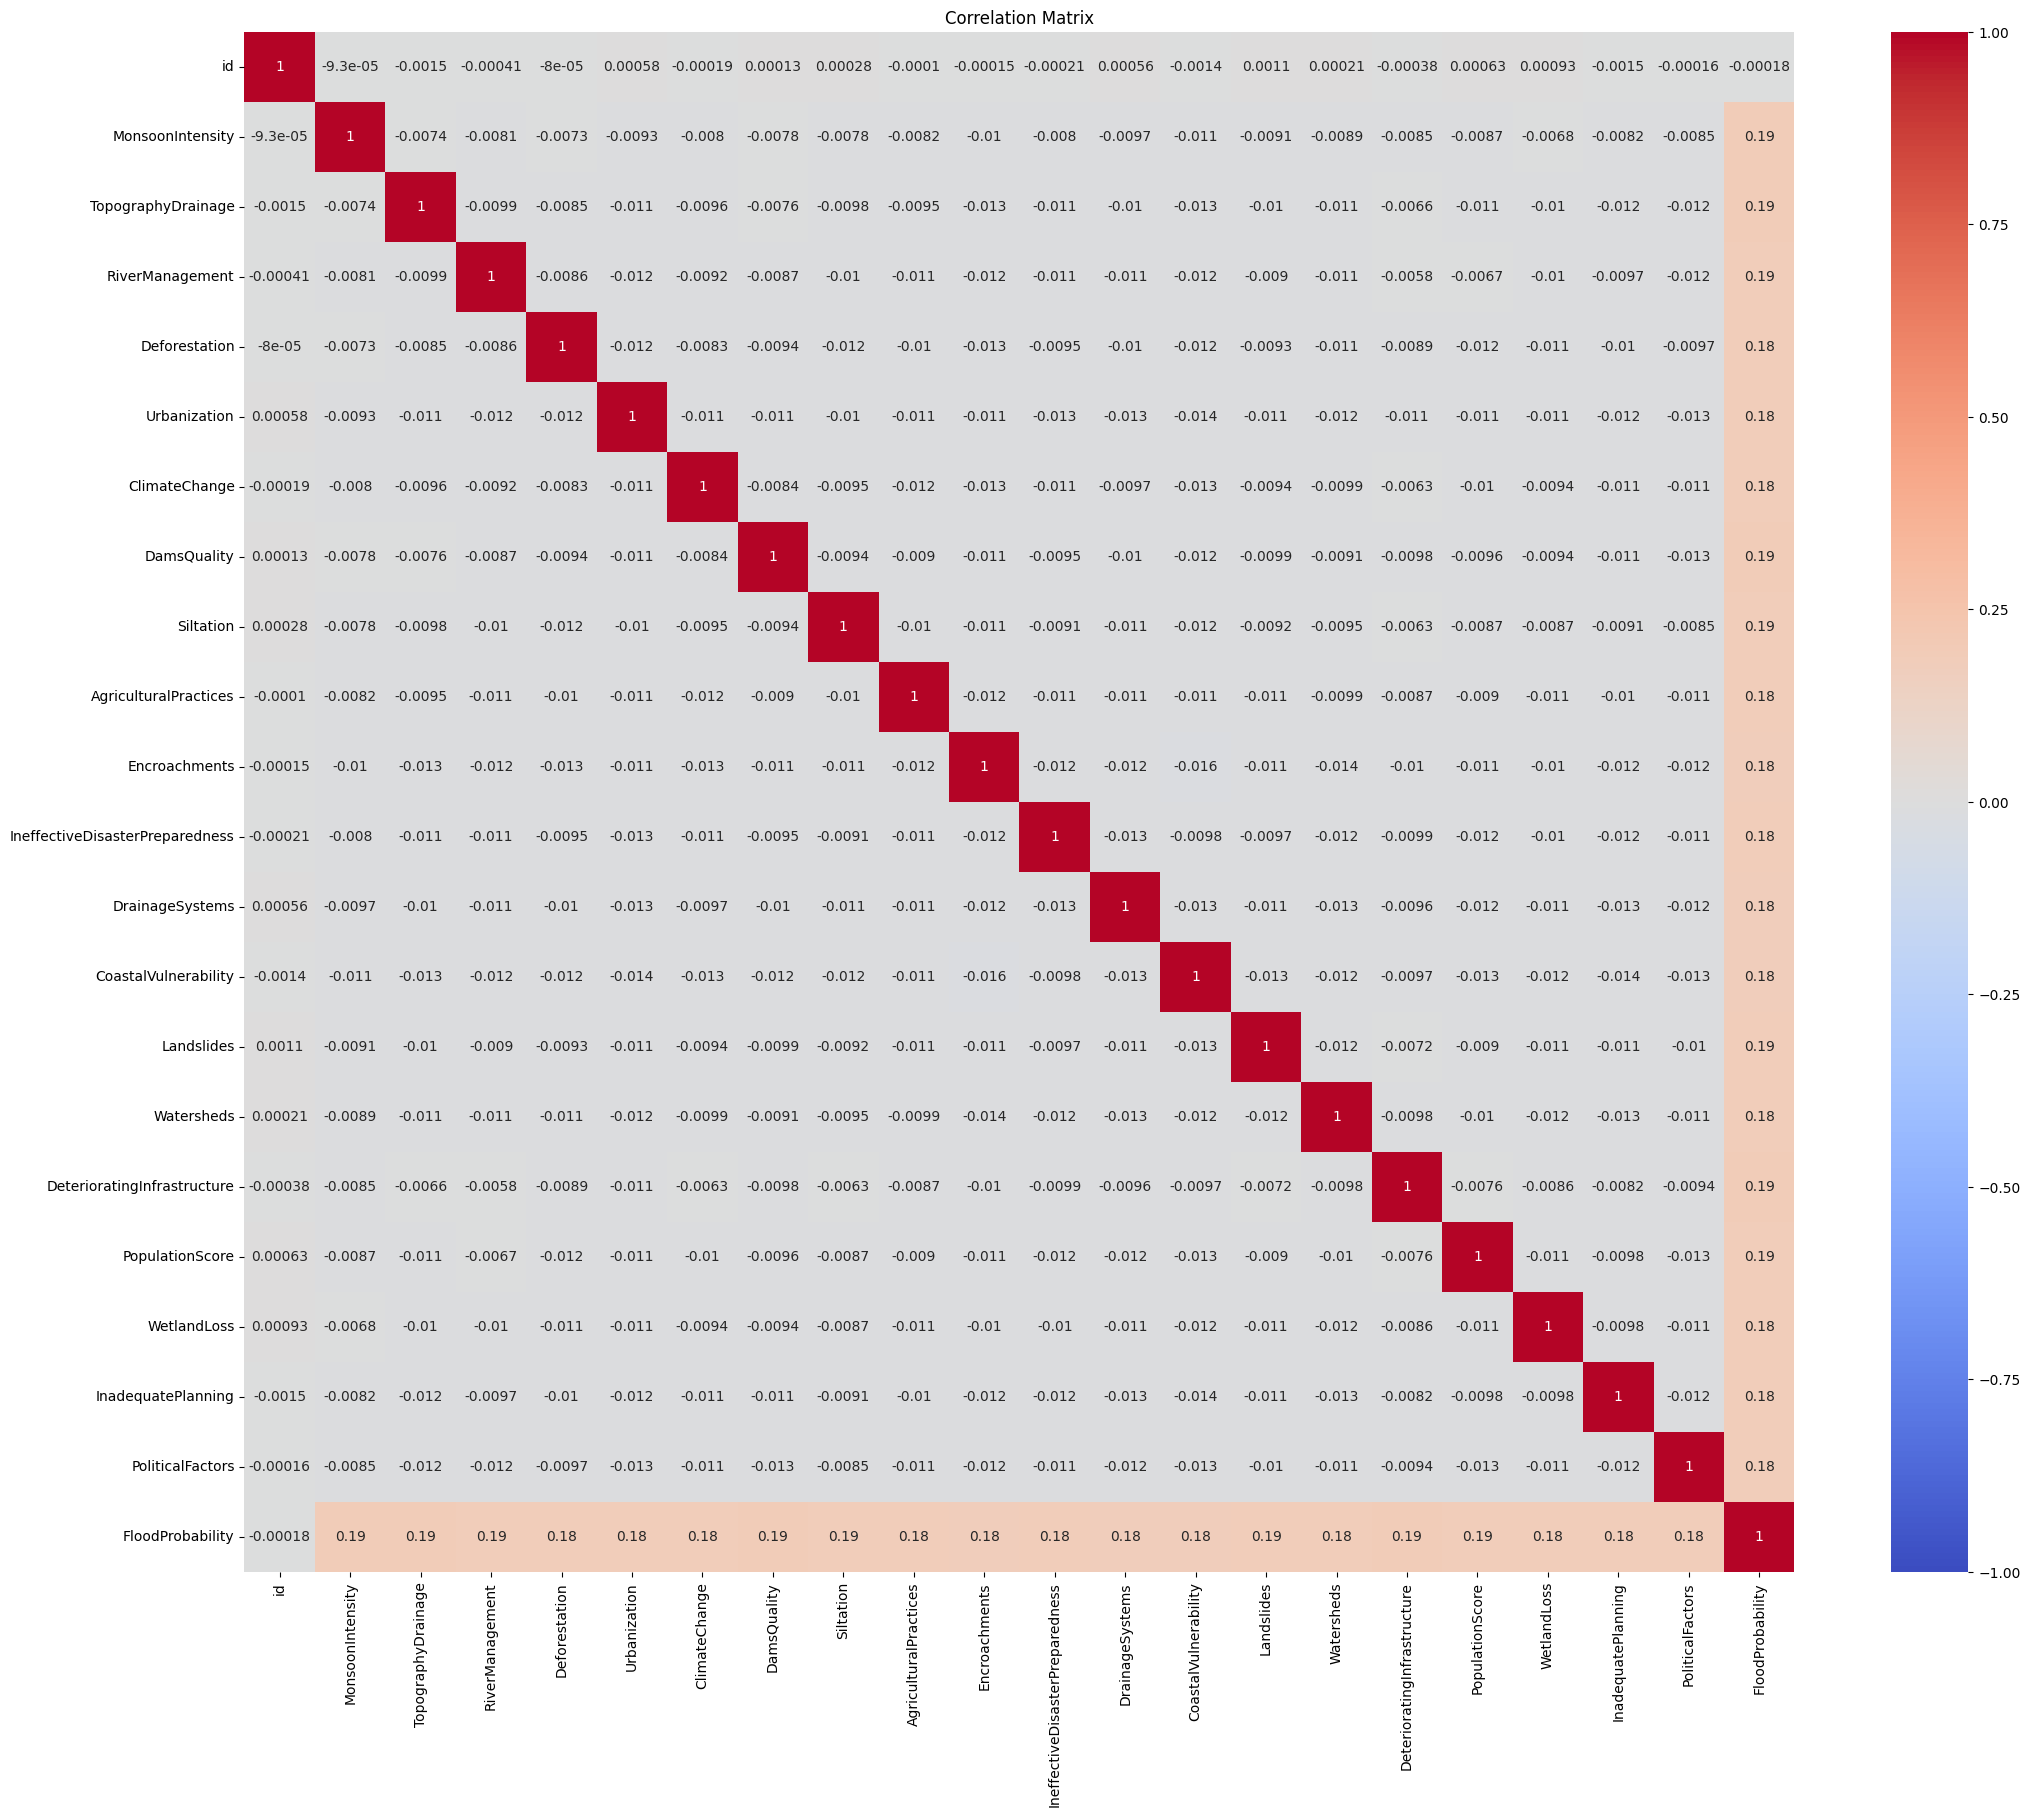

In [5]:
# Correlation matrix
plt.figure(figsize=(25, 20))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [6]:
selected_features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 
                     'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 
                     'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 
                     'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 
                     'PoliticalFactors']

# Define features and target variable
X = train[selected_features]
y = train['FloodProbability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                            Feature  Coefficient
16                  PopulationScore     0.005681
3                     Deforestation     0.005681
12             CoastalVulnerability     0.005671
2                   RiverManagement     0.005662
4                      Urbanization     0.005659
5                     ClimateChange     0.005659
6                       DamsQuality     0.005653
14                       Watersheds     0.005648
9                     Encroachments     0.005646
19                 PoliticalFactors     0.005646
1                TopographyDrainage     0.005645
13                       Landslides     0.005643
7                         Siltation     0.005640
10  IneffectiveDisasterPreparedness     0.005640
17                      WetlandLoss     0.005640
8             AgriculturalPractices     0.005639
11                  DrainageSystems     0.005633
15      DeterioratingInfrastructure     0.005618
0                  MonsoonIntensity     0.005613
18               Ina

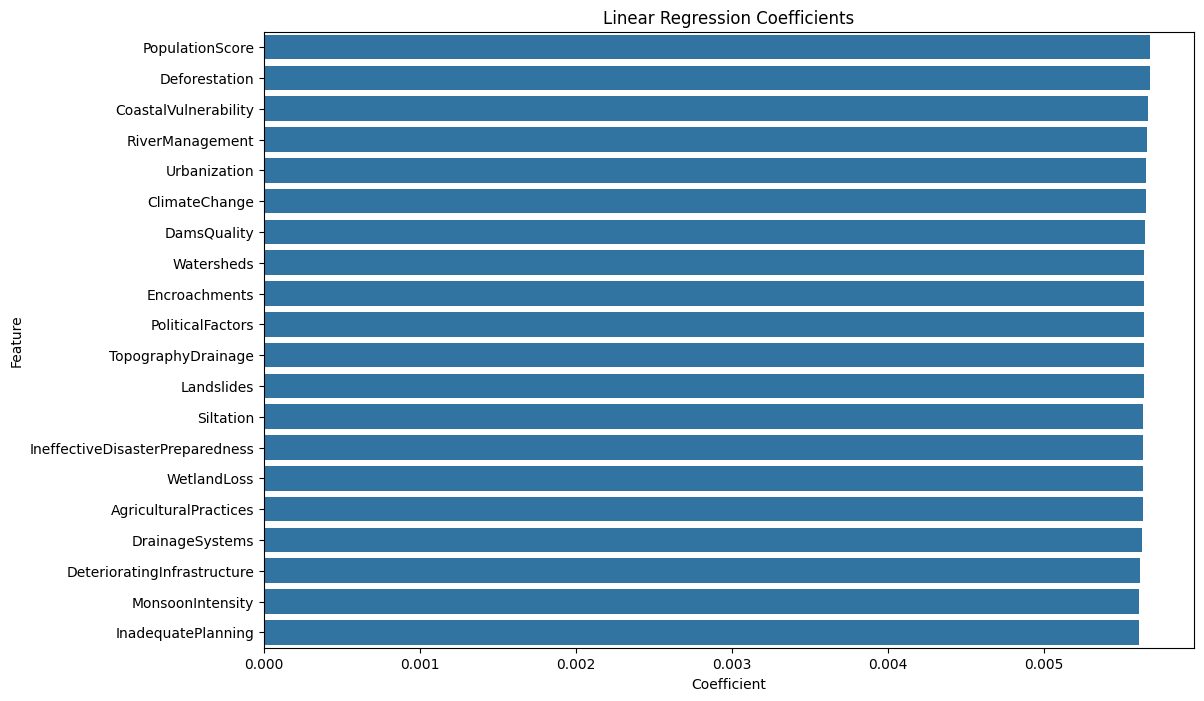

In [7]:
# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.show()

### Answer 

Flooding is a complex phenomenon influenced by a variety of natural and human-induced factors. Based on general knowledge, research reports, and established facts, the following features from your dataset are known to generally affect flooding in an area:

- MonsoonIntensity: Heavy and prolonged monsoon rains can lead to increased water levels in rivers and reservoirs, causing floods.

- TopographyDrainage: The natural drainage patterns and topography of an area influence how water flows and accumulates, affecting flood risk.
- RiverManagement: Effective management of rivers, including embankments and floodplains, can mitigate flooding. Poor management can exacerbate it.
- Deforestation: Removal of trees reduces the land's ability to absorb water, leading to increased runoff and higher flood risk.
- Urbanization: Urban areas with impermeable surfaces like concrete increase runoff, reducing the land's natural ability to absorb water.
- ClimateChange: Changes in climate patterns, including increased frequency and intensity of extreme weather events, contribute to higher flood risks.
- DamsQuality: The condition and management of dams are crucial. Poorly maintained or managed dams can fail, leading to sudden flooding downstream.
- Siltation: Accumulation of silt in rivers and reservoirs reduces their capacity to hold water, increasing the likelihood of overflow during heavy rains.
- AgriculturalPractices: Certain practices can affect soil absorption and runoff. Poor practices can lead to increased erosion and sedimentation, affecting water flow.
- Encroachments: Building on floodplains and other natural water courses reduces the land available for water absorption and increases flood risk.
- IneffectiveDisasterPreparedness: Lack of adequate preparation and response plans can exacerbate the impacts of flooding when it occurs.
- DrainageSystems: Poorly designed or maintained drainage systems can lead to waterlogging and flooding, especially in urban areas.
- CoastalVulnerability: Coastal areas are particularly vulnerable to flooding from storm surges and sea-level rise.
- Landslides: Heavy rains can trigger landslides, which can block rivers and create temporary dams that might lead to sudden flooding if they fail.
- Watersheds: The health and management of watershed areas affect how water is collected and distributed in a region, influencing flood dynamics.
- DeterioratingInfrastructure: Aging infrastructure, such as bridges, culverts, and stormwater systems, can fail during heavy rains, exacerbating flooding.
- PopulationScore: Higher population densities can increase the impact of flooding due to greater numbers of people and infrastructure at risk.
- WetlandLoss: Wetlands act as natural sponges, absorbing and slowing down water flow. Their loss reduces this natural flood mitigation function.
- InadequatePlanning: Poor urban and regional planning can lead to development in flood-prone areas, increasing the risk and impact of flooding.
- PoliticalFactors: Governance and political decisions influence the implementation of flood mitigation measures and disaster response strategies.


From the features listed in your dataset, the following are known to generally affect flooding:

    MonsoonIntensity
    TopographyDrainage
    RiverManagement
    Deforestation
    Urbanization
    ClimateChange
    DamsQuality
    Siltation
    AgriculturalPractices
    Encroachments
    IneffectiveDisasterPreparedness
    DrainageSystems
    CoastalVulnerability
    Landslides
    Watersheds
    DeterioratingInfrastructure
    PopulationScore
    WetlandLoss
    InadequatePlanning
    PoliticalFactors

- All of our features have almost equal impact on the flood probability...

- so there's a limit to how far we can go with these features...

- Another observation made is that preprocessing might not really help the model performance...

## What's the way forward?? 

How about feature engineering?

In [22]:
## Something related to the Drainage System
df = train.copy()

def create_new_feat(df):

    # Standardize numerical feature columns
    # Ensuring different scale features have the same scale, which helps the model's learning and convergence.
    scaler = StandardScaler()
    print("Started")
    df['MonsoonIntensity_DrainageSystems'] = df['MonsoonIntensity'] * df['DrainageSystems']
    df['Urbanization_DrainageSystems'] = df['Urbanization'] * df['DrainageSystems']
    df['ClimateChange_DrainageSystems'] = df['ClimateChange'] * df['DrainageSystems']
    df['DamsQuality_DrainageSystems'] = df['DamsQuality'] * df['DrainageSystems']
    df['Siltation_DrainageSystems'] = df['Siltation'] * df['DrainageSystems']
    df['ClimateChange_Landslides'] = df['ClimateChange'] * df['Landslides']

    # some aggregation
    df['Infrastructure_Quality_Avg'] = df[['DamsQuality', 'DrainageSystems', 'DeterioratingInfrastructure']].mean(axis=1)
    df['Urbanization_Avg'] = df[['Urbanization', 'PopulationScore']].mean(axis=1)
    df['ClimateChange_Avg'] = df[['ClimateChange', 'WetlandLoss']].mean(axis=1)

    # Aggregated scores for risk factors
    df['HumanImpactScore'] = df[['Urbanization', 'Deforestation', 'AgriculturalPractices', 'Encroachments', 'InadequatePlanning']].sum(axis=1)
    df['NaturalRiskScore'] = df[['MonsoonIntensity', 'TopographyDrainage', 'ClimateChange', 'Landslides', 'CoastalVulnerability']].sum(axis=1)
    
    # Create interaction features
    # Climate and human activity interaction features: Reflecting the combined impact of climate change intensity and human activities such as deforestation, urbanization, etc.
    df['ClimateAnthropogenicInteraction'] = (df['MonsoonIntensity'] + df['ClimateChange']) * \
                                            (df['Deforestation'] + df['Urbanization'] + df['AgriculturalPractices'] + df['Encroachments'])
    
    # Infrastructure and disaster management interaction features: Examining the interaction between infrastructure quality and inadequate disaster preparedness.
    df['InfrastructurePreventionInteraction'] = (df['DamsQuality'] + df['DrainageSystems'] + df['DeterioratingInfrastructure']) * \
                                                (df['RiverManagement'] + df['IneffectiveDisasterPreparedness'] + df['InadequatePlanning'])
    
    print('Part 2')
    ###################### NEW FEATURES ######################

    # Create descriptive statistical features
    # Basic statistics: Providing the model with simple statistical descriptions of the raw data.
    df['sum'] = df[selected_features].sum(axis=1)   # Sum of features
    print('Part 2.1')
    df['std'] = df[selected_features].std(axis=1)   # Standard deviation
    print('Part 2.2')
    df['mean'] = df[selected_features].mean(axis=1) # Mean
    print('Part 2.3')
    df['max'] = df[selected_features].max(axis=1)   # Maximum value
    print('Part 2.4')
    df['min'] = df[selected_features].min(axis=1)   # Minimum value
    print('Part 2.5')
    # df['mode'] = df[selected_features].mode(axis=1)[0]  # Mode
    # print('Part 2.6')
    df['median'] = df[selected_features].median(axis=1) # Median
    print('Part 2.7')
    df['q_25th'] = df[selected_features].quantile(0.25, axis=1) # 25th percentile
    print('Part 2.8')
    df['q_75th'] = df[selected_features].quantile(0.75, axis=1) # 75th percentile
    print('Part 2.9')
    df['skew'] = df[selected_features].skew(axis=1) # Skewness
    print('Part 2.10')
    df['kurt'] = df[selected_features].kurt(axis=1) # Kurtosis
    print('Part 2.11')
    
    print('Part 3')
    # Range feature: Check if the sum of features falls within a specific range.
    df['sum_72_76'] = df['sum'].isin(np.arange(72, 76))
    
    print('Part 4')
    # Quantile features: Providing the model with more detailed data distribution information.
    for i in range(10, 100, 10):
        df[f'{i}th'] = df[selected_features].quantile(i / 100, axis=1)
    
    print('Part 5')
    # Other mathematical features
    # df['harmonic'] = len(selected_features) / df[selected_features].apply(lambda x: (1/x).mean(), axis=1) # Harmonic mean
    print('Part 5.1')
    df['geometric'] = df[selected_features].apply(lambda x: x.prod()**(1/len(x)), axis=1) # Geometric mean
    print('Part 5.2')
    # df['zscore'] = df[selected_features].apply(lambda x: (x - x.mean()) / x.std(), axis=1).mean(axis=1) # Z-score mean
    # print('Part 5.3')
    df['cv'] = df[selected_features].std(axis=1) / df[selected_features].mean(axis=1) # Coefficient of variation
    print('Part 5.4')
    df['Skewness_75'] = (df[selected_features].quantile(0.75, axis=1) - df[selected_features].mean(axis=1)) / df[selected_features].std(axis=1) # 75th percentile skewness
    print('Part 5.5')
    df['Skewness_25'] = (df[selected_features].quantile(0.25, axis=1) - df[selected_features].mean(axis=1)) / df[selected_features].std(axis=1) # 25th percentile skewness
    print('Part 5.6')
    # df['2ndMoment'] = df[selected_features].apply(lambda x: (x**2).mean(), axis=1) # Second moment
    # print('Part 5.7')
    # df['3rdMoment'] = df[selected_features].apply(lambda x: (x**3).mean(), axis=1) # Third moment
    # print('Part 5.8')
    # df['entropy'] = df[selected_features].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1) # Entropy
    # print('Part 5.9')
    
    print('Part 6')
    df[selected_features] = scaler.fit_transform(df[selected_features])
    
    print('DONE')

    return df


In [23]:
df = create_new_feat(train)

Started
Part 2
Part 2.1
Part 2.2
Part 2.3
Part 2.4
Part 2.5
Part 2.7
Part 2.8
Part 2.9
Part 2.10
Part 2.11
Part 3
Part 4
Part 5
Part 5.1
Part 5.2
Part 5.4
Part 5.5
Part 5.6
Part 6
DONE


In [24]:
df.shape

(1117957, 59)

In [25]:
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability,MonsoonIntensity_DrainageSystems,Urbanization_DrainageSystems,ClimateChange_DrainageSystems,DamsQuality_DrainageSystems,Siltation_DrainageSystems,ClimateChange_Landslides,Infrastructure_Quality_Avg,Urbanization_Avg,ClimateChange_Avg,HumanImpactScore,NaturalRiskScore,ClimateAnthropogenicInteraction,InfrastructurePreventionInteraction,sum,std,mean,max,min,median,q_25th,q_75th,skew,kurt,sum_72_76,10th,20th,30th,40th,50th,60th,70th,80th,90th,geometric,cv,Skewness_75,Skewness_25
0,0,0.038198,1.467769,0.021561,1.490363,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,-0.455632,-1.417247,0.025627,-0.935421,-0.929312,0.034080,-0.448422,0.999183,0.023754,0.989569,-0.927598,0.445,25,30,20,20,15,12,4.333333,6.5,4.5,28,23,189,182,94,1.750188,4.70,8,2,4.5,3.00,5.25,0.577258,-0.521862,False,3.0,3.0,3.7,4.0,4.5,5.0,5.0,6.2,7.1,4.397569,0.372380,0.314252,-0.971324
1,1,0.524488,0.990186,-0.461022,-0.459251,1.467552,1.489938,-0.938943,0.034951,-0.455692,0.504372,1.951149,0.990723,-1.414142,-2.372809,-0.926353,0.035884,-0.929294,-0.943039,-0.451962,-0.927598,0.450,42,56,56,21,35,0,5.000000,5.5,5.5,26,23,308,255,94,2.296450,4.70,9,0,4.0,3.00,6.25,0.148339,-0.358403,False,2.9,3.0,3.0,4.0,4.0,5.0,6.0,7.0,8.0,0.000000,0.488606,0.674955,-0.740273
2,2,0.524488,0.035021,0.504143,1.002959,-0.932383,1.003968,-1.899068,0.034951,-0.455692,0.024370,0.507551,0.990723,-0.935421,0.995351,0.034080,0.520189,1.481302,-1.426435,-0.932472,-0.927598,0.530,42,21,49,7,35,49,4.666667,5.5,4.5,22,28,247,210,99,1.932411,4.95,8,1,5.0,3.00,6.25,-0.408083,-0.742415,False,2.9,3.0,3.7,5.0,5.0,6.0,6.0,7.0,7.0,4.468658,0.390386,0.672735,-1.009102
3,3,-0.934382,-0.442562,0.504143,0.028152,-0.452396,1.489938,-0.458881,1.003010,0.511171,1.464377,0.026351,-1.422018,-0.456700,0.995351,-0.446137,-0.448422,0.517064,0.023754,0.989569,0.029180,0.535,6,8,16,8,14,56,3.333333,5.0,6.5,30,26,253,180,104,1.641565,5.20,8,2,5.0,4.00,6.25,0.120566,-0.590749,False,3.9,4.0,4.0,4.6,5.0,5.4,6.0,7.0,7.1,4.933055,0.315686,0.639633,-0.731010
4,4,0.038198,-0.920145,-1.426186,0.515556,-0.452396,-0.453941,-0.938943,-0.933107,-0.939124,-0.935635,0.026351,-1.422018,-1.414142,0.514185,0.514296,-0.448422,-1.893533,-1.426435,-0.932472,0.029180,0.415,10,8,8,6,6,24,3.000000,2.5,3.0,19,20,144,90,72,1.500877,3.60,6,1,3.0,2.75,5.00,0.253227,-0.922261,True,2.0,2.0,3.0,3.0,3.0,4.0,4.3,5.0,6.0,3.275062,0.416910,0.932788,-0.566336


In [26]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,5.589780e+05,322726.531784,0.000000,279489.000000,558978.000000,838467.000000,1.117956e+06
MonsoonIntensity,1117957.0,-1.661387e-16,1.000000,-2.393253,-0.934382,0.038198,0.524488,5.387389e+00
TopographyDrainage,1117957.0,1.552704e-16,1.000000,-2.352893,-0.920145,0.035021,0.512604,6.243596e+00
RiverManagement,1117957.0,-4.782048e-17,1.000000,-2.391351,-0.461022,0.021561,0.504143,5.329966e+00
Deforestation,1117957.0,1.598433e-16,1.000000,-2.408865,-0.459251,0.028152,0.515556,5.876993e+00
Urbanization,1117957.0,-1.704923e-16,1.000000,-2.372343,-0.932383,0.027591,0.507578,5.787435e+00
ClimateChange,1117957.0,-1.904715e-16,1.000000,-2.397820,-0.939911,0.032029,0.517999,5.863667e+00
DamsQuality,1117957.0,-2.444031e-16,1.000000,-2.379131,-0.458881,0.021182,0.501244,5.301869e+00
Siltation,1117957.0,-1.143840e-16,1.000000,-2.385195,-0.933107,0.034951,0.518981,5.359273e+00
AgriculturalPractices,1117957.0,9.081696e-17,1.000000,-2.389419,-0.939124,0.027740,0.511171,5.345489e+00


In [27]:
# dropping the id column
df.drop('id', axis=1, inplace=True)

In [28]:
# training the regression model again
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

,Feature,Coefficient
33,sum,4.389925e+07
5,ClimateChange,2.924931e+07
4,Urbanization,2.245258e+07
38,median,2.247927e+06
35,mean,1.407405e+06
43,sum_72_76,4.742423e-02
40,q_75th,3.781453e-03
34,std,3.138468e-03
41,skew,1.387335e-03
47,40th,3.419798e-04


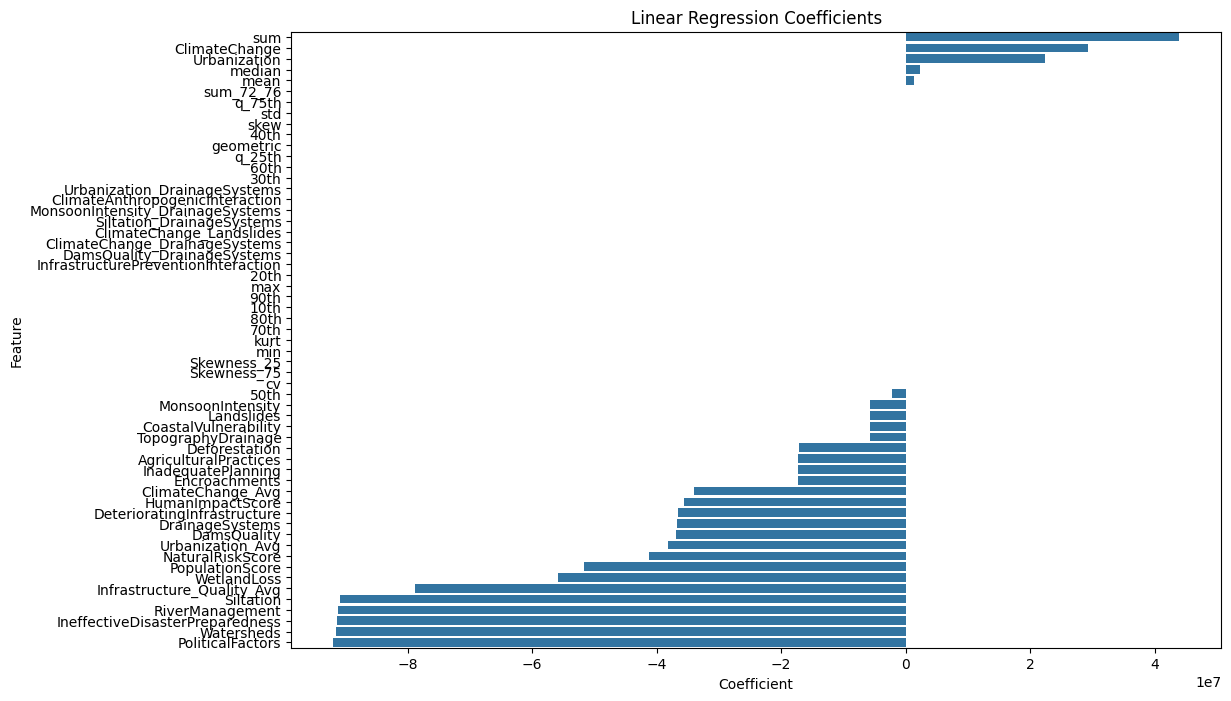

In [29]:
# Plot coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Linear Regression Coefficients')
plt.show()

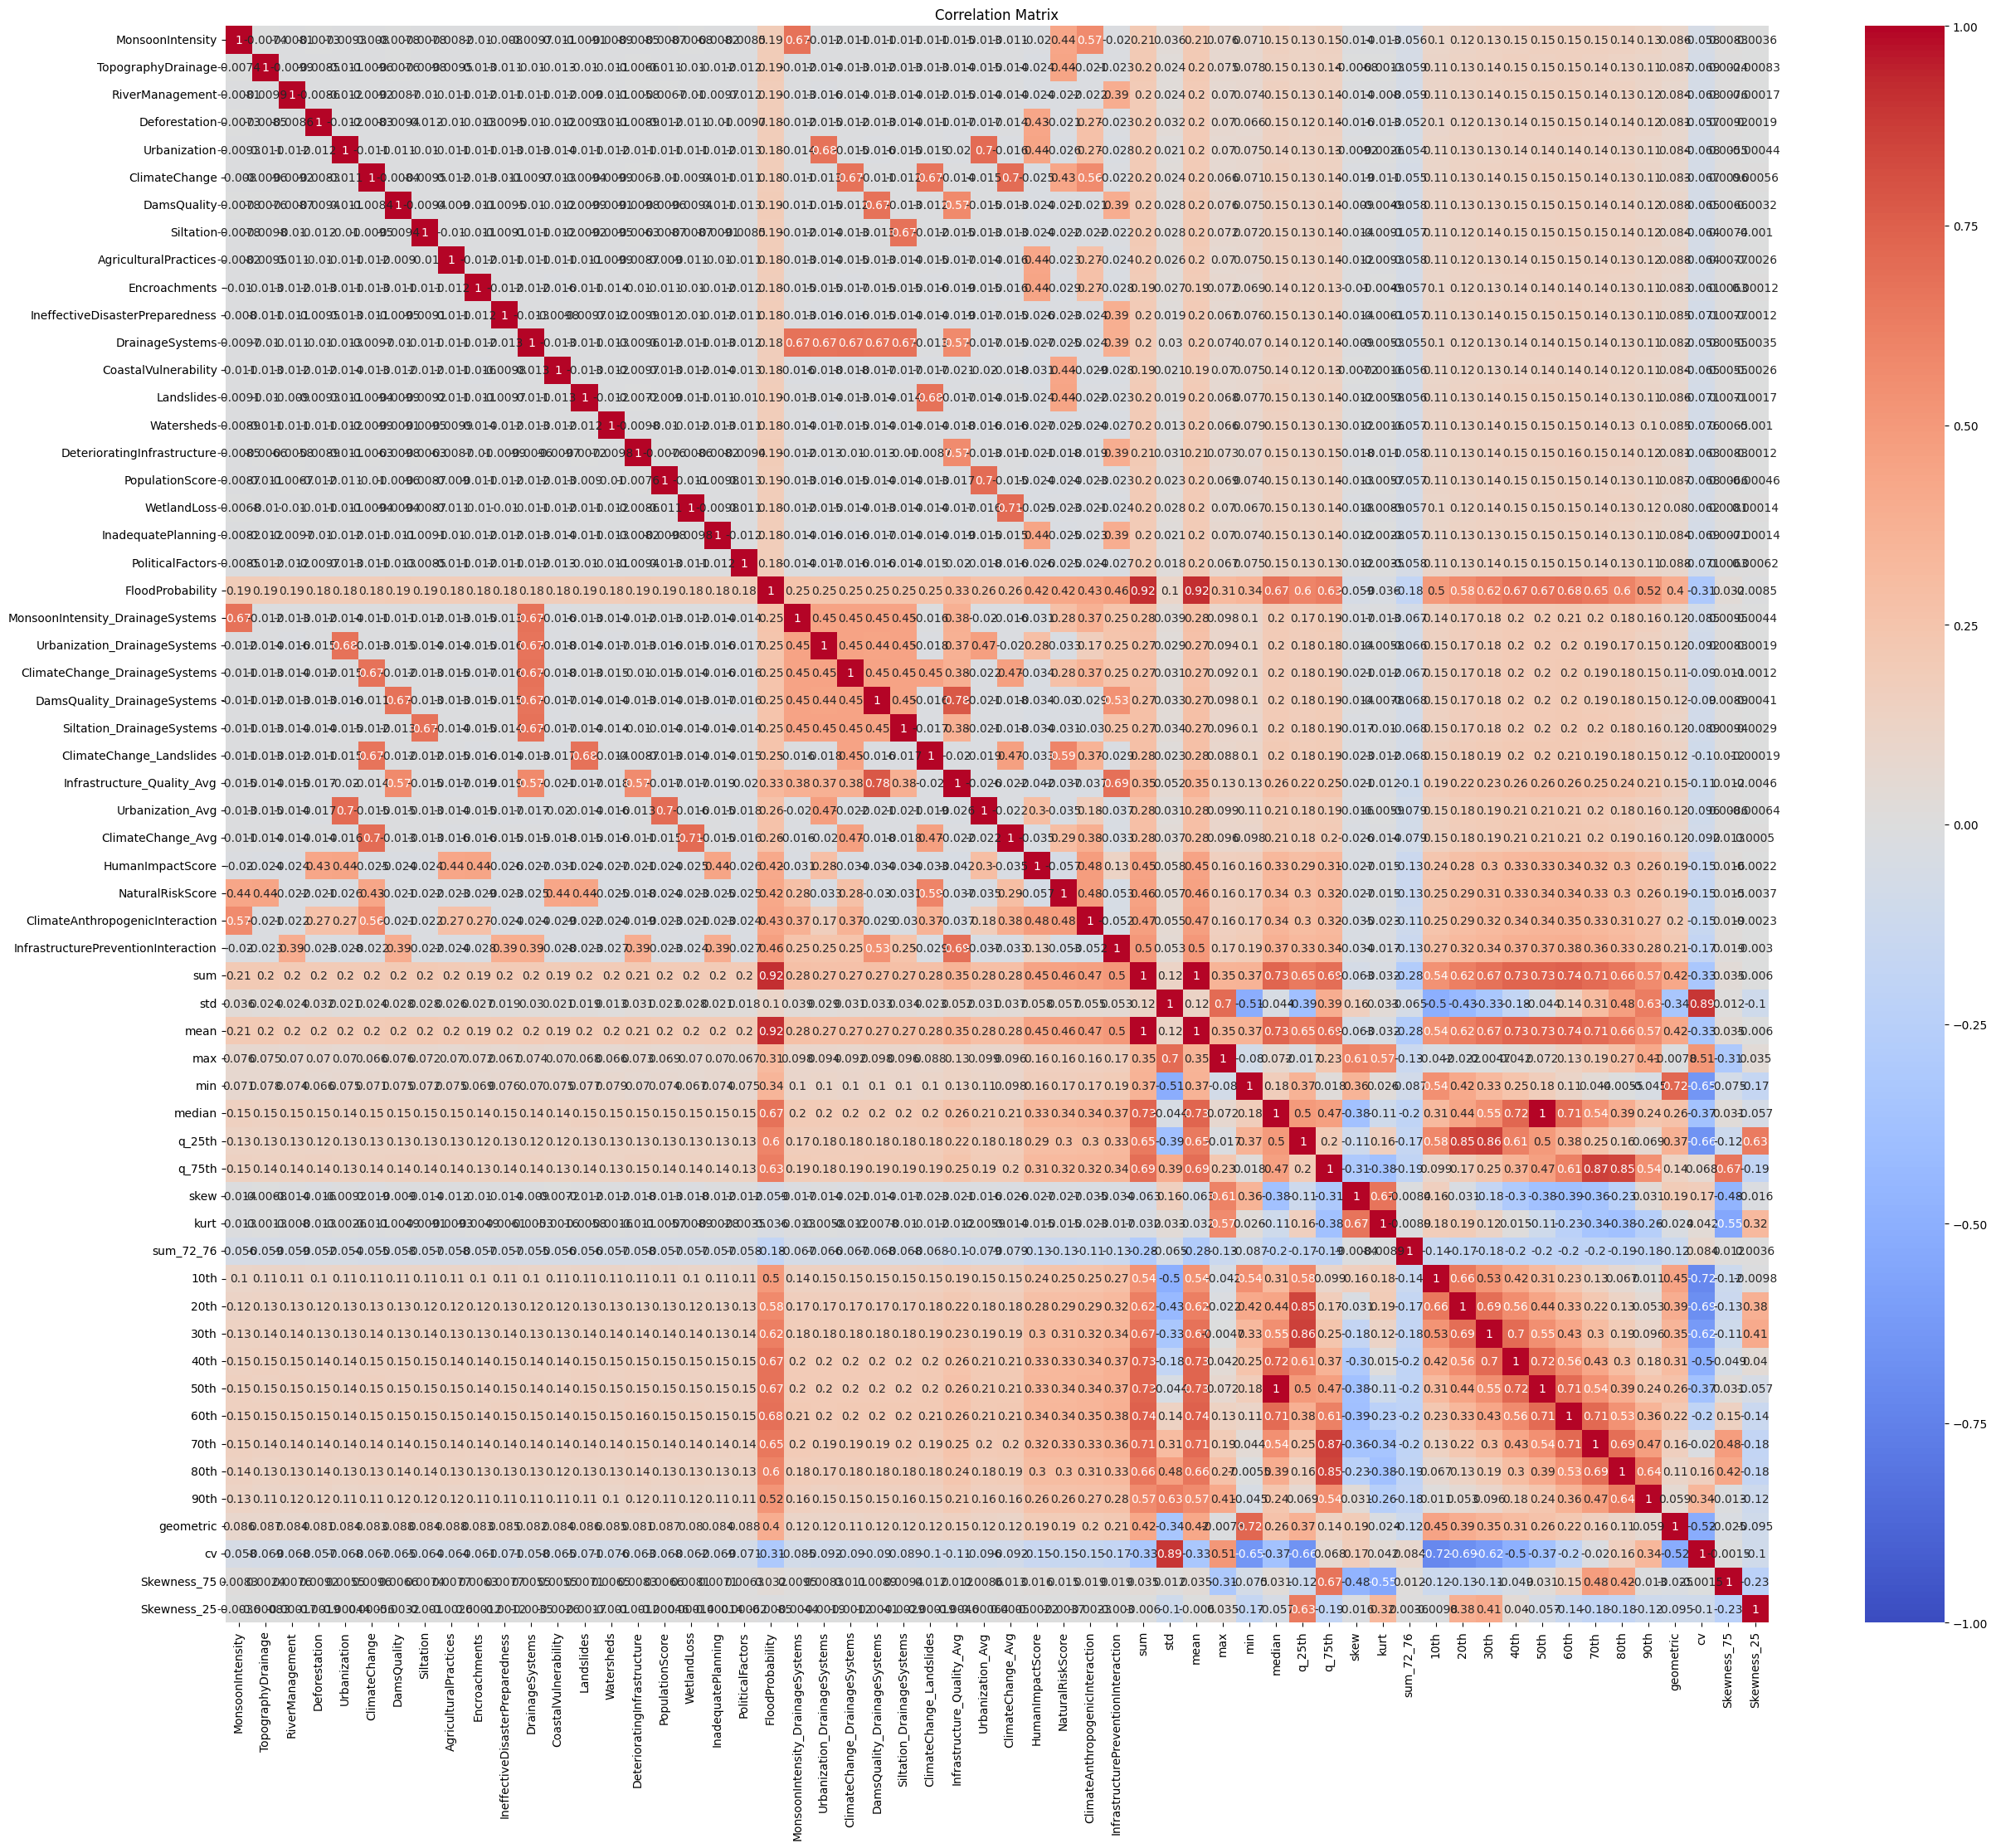

In [30]:
# Correlation matrix
plt.figure(figsize=(30, 25))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

##  Let GO!!!!!! -->

In [31]:
# Importing metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [32]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)



In [33]:
# validating the model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003861544315041854
Mean Absolute Error: 0.015446685263754758
R2 Score: 0.8514376849523029


In [34]:
# Trying catboost regressor
from catboost import CatBoostRegressor

# CatBoost Regressor
cat_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, loss_function='RMSE', verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_cat)
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred_cat)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.00034100723274036615
Mean Absolute Error: 0.014366627709826905
R2 Score: 0.868806830089768


In [35]:
# looking at the best perfoming features
feature_importances = cat_model.get_feature_importance()
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
33,sum,49.999592
35,mean,45.800942
36,max,0.831041
53,geometric,0.494287
43,sum_72_76,0.343909
34,std,0.201627
54,cv,0.182742
42,kurt,0.124964
41,skew,0.116077
52,90th,0.096083


In [36]:
# Trying other models to see their performance

# XGBOOST
from xgboost import XGBRegressor

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)

Mean Squared Error: 0.0003423350521647654
Mean Absolute Error: 0.01435715380801089
R2 Score: 0.8682959880235883


In [37]:
# looking at the best perfoming features
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Feature,Importance
33,sum,0.906185
43,sum_72_76,0.040328
36,max,0.010793
34,std,0.001966
53,geometric,0.001514
49,60th,0.001215
51,80th,0.001198
45,20th,0.001167
41,skew,0.001142
40,q_75th,0.001102


In [38]:
# LIGHTGBM
from lightgbm import LGBMRegressor

# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# validating the model
mse = mean_squared_error(y_test, y_pred_lgb)
mae = mean_absolute_error(y_test, y_pred_lgb)
r2 = r2_score(y_test, y_pred_lgb)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.261872 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3643
[LightGBM] [Info] Number of data points in the train set: 894365, number of used features: 57
[LightGBM] [Info] Start training from score 0.504480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

## Finetuning Catboost

In [44]:
# training the regression model again
X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


### Catboost

In [47]:
from sklearn.model_selection import KFold

# Parameter settings for CatBoost model
cat_params = {
    'n_estimators': 8000,                  # Number of boosting iterations
    'random_state': 0,                     # Random seed for reproducibility
    'learning_rate': 0.011277016304363601, # Learning rate (shrinkage)
    'depth': 8,                            # Depth of the tree
    'subsample': 0.8675506657380021,       # Subsample ratio of the training instances
    # 'colsample_bylevel': 0.7183884158632279, # Subsample ratio of columns for each level (commented out)
    'min_data_in_leaf': 98,                # Minimum number of samples in a leaf node
    'task_type': 'GPU',                    # Use GPU for training
    'bootstrap_type': 'Bernoulli'          # Type of bootstrapping (randomly sample the data)
}

# Initialize variables
spl = 10
cat_test_preds = np.zeros((len(X_test)))
cat_val_preds = np.zeros((len(X_train)))
cat_val_scores, cat_train_scores = [], []

# Define cross-validation
cv = KFold(spl, shuffle=True, random_state=0)

# Cross-validation loop
for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train, y_train)):
    # Data splitting
    X_fold_train = X_train.iloc[train_ind]
    y_fold_train = y_train.iloc[train_ind]
    X_val = X_train.iloc[valid_ind]
    y_val = y_train.iloc[valid_ind]
    
    # Model initialization and training
    model = CatBoostRegressor(**cat_params)   
    model.fit(X_fold_train, y_fold_train,
              eval_set=[(X_val, y_val)],
              early_stopping_rounds=70,
              verbose=100)
    
    # Prediction and evaluation
    y_pred_trn = model.predict(X_fold_train)
    y_pred_val = model.predict(X_val)
    train_r2 = r2_score(y_fold_train, y_pred_trn)
    val_r2 = r2_score(y_val, y_pred_val)
    print("Fold:", fold, " Train R2:", np.round(train_r2, 5), " Val R2:", np.round(val_r2, 5))
    
    # Store predictions
    cat_test_preds += model.predict(X_test) / spl
    cat_val_preds[valid_ind] = model.predict(X_val)
    cat_val_scores.append(val_r2)
    print("-" * 50)

# Print the average validation score
print("Average Validation R2:", np.mean(cat_val_scores))

0:	learn: 0.0505536	test: 0.0504654	best: 0.0504654 (0)	total: 186ms	remaining: 24m 45s
100:	learn: 0.0244532	test: 0.0243794	best: 0.0243794 (100)	total: 2.92s	remaining: 3m 48s
200:	learn: 0.0195031	test: 0.0194509	best: 0.0194509 (200)	total: 5.75s	remaining: 3m 43s
300:	learn: 0.0187850	test: 0.0187460	best: 0.0187460 (300)	total: 8.16s	remaining: 3m 28s
400:	learn: 0.0186521	test: 0.0186211	best: 0.0186211 (400)	total: 10.4s	remaining: 3m 17s
500:	learn: 0.0186034	test: 0.0185770	best: 0.0185770 (500)	total: 12.7s	remaining: 3m 9s
600:	learn: 0.0185745	test: 0.0185511	best: 0.0185511 (600)	total: 15s	remaining: 3m 4s
700:	learn: 0.0185522	test: 0.0185324	best: 0.0185324 (700)	total: 17.3s	remaining: 2m 59s
800:	learn: 0.0185335	test: 0.0185157	best: 0.0185157 (800)	total: 19.6s	remaining: 2m 55s
900:	learn: 0.0185183	test: 0.0185036	best: 0.0185036 (900)	total: 21.9s	remaining: 2m 52s
1000:	learn: 0.0185057	test: 0.0184940	best: 0.0184940 (1000)	total: 24.3s	remaining: 2m 49s
1100

### XGBoost

In [49]:
from sklearn.model_selection import KFold

# Parameter settings for XGBoost model
xgb_params = {
    'n_estimators': 8000,      # Number of boosting rounds
    'max_depth': 10,
    'tree_method': 'hist',                     # Maximum tree depth for base learners
    'device': 'cuda', # Tree construction algorithm, using GPU
    'learning_rate': 0.01,     # Learning rate (shrinkage)
    'random_state': 0,         # Random seed for reproducibility
}

# Initialize variables
spl = 10
xgb_test_preds = np.zeros((len(X_test)))
xgb_val_preds = np.zeros((len(X_train)))
xgb_val_scores, xgb_train_scores = [], []

# Define cross-validation
cv = KFold(spl, shuffle=True, random_state=0)

# Cross-validation loop
for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train, y_train)):
    # Data splitting
    X_fold_train = X_train.iloc[train_ind]
    y_fold_train = y_train.iloc[train_ind]
    X_val = X_train.iloc[valid_ind]
    y_val = y_train.iloc[valid_ind]
    
    # Model initialization and training
    model = XGBRegressor(**xgb_params)   
    model.fit(X_fold_train, y_fold_train,
              eval_set=[(X_fold_train, y_fold_train), (X_val, y_val)],
              early_stopping_rounds=70,
              verbose=100)
    
    # Predict and evaluate
    y_pred_trn = model.predict(X_fold_train)
    y_pred_val = model.predict(X_val)
    train_r2 = r2_score(y_fold_train, y_pred_trn)
    val_r2 = r2_score(y_val, y_pred_val)
    print("Fold:", fold, " Train R2:", np.round(train_r2, 5), " Val R2:", np.round(val_r2, 5))
    
    # Store predictions
    xgb_test_preds += model.predict(X_test) / spl
    xgb_val_preds[valid_ind] = model.predict(X_val)
    xgb_val_scores.append(val_r2)
    print("-" * 50)

# Print the average validation score
print("Average Validation R2:", np.mean(xgb_val_scores))

c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.05060	validation_1-rmse:0.05051
[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02521
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01947
[300]	validation_0-rmse:0.01833	validation_1-rmse:0.01858
[400]	validation_0-rmse:0.01813	validation_1-rmse:0.01846
[500]	validation_0-rmse:0.01804	validation_1-rmse:0.01844
[600]	validation_0-rmse:0.01797	validation_1-rmse:0.01844
[673]	validation_0-rmse:0.01791	validation_1-rmse:0.01844
Fold: 0  Train R2: 0.87611  Val R2: 0.869
--------------------------------------------------
[0]	validation_0-rmse:0.05059	validation_1-rmse:0.05052


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02526
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01953
[300]	validation_0-rmse:0.01832	validation_1-rmse:0.01864
[400]	validation_0-rmse:0.01812	validation_1-rmse:0.01852
[500]	validation_0-rmse:0.01803	validation_1-rmse:0.01850
[600]	validation_0-rmse:0.01795	validation_1-rmse:0.01850
[639]	validation_0-rmse:0.01792	validation_1-rmse:0.01850
Fold: 1  Train R2: 0.87599  Val R2: 0.86826
--------------------------------------------------
[0]	validation_0-rmse:0.05061	validation_1-rmse:0.05042


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02521	validation_1-rmse:0.02521
[200]	validation_0-rmse:0.01934	validation_1-rmse:0.01947
[300]	validation_0-rmse:0.01833	validation_1-rmse:0.01856
[400]	validation_0-rmse:0.01813	validation_1-rmse:0.01844
[500]	validation_0-rmse:0.01804	validation_1-rmse:0.01842
[600]	validation_0-rmse:0.01796	validation_1-rmse:0.01842
[618]	validation_0-rmse:0.01795	validation_1-rmse:0.01842
Fold: 2  Train R2: 0.8756  Val R2: 0.86882
--------------------------------------------------
[0]	validation_0-rmse:0.05058	validation_1-rmse:0.05066


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02533
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01955
[300]	validation_0-rmse:0.01833	validation_1-rmse:0.01862
[400]	validation_0-rmse:0.01813	validation_1-rmse:0.01849
[500]	validation_0-rmse:0.01804	validation_1-rmse:0.01847
[600]	validation_0-rmse:0.01796	validation_1-rmse:0.01847
[638]	validation_0-rmse:0.01793	validation_1-rmse:0.01847
Fold: 3  Train R2: 0.87574  Val R2: 0.86936
--------------------------------------------------
[0]	validation_0-rmse:0.05059	validation_1-rmse:0.05053


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02519	validation_1-rmse:0.02529
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01957
[300]	validation_0-rmse:0.01832	validation_1-rmse:0.01867
[400]	validation_0-rmse:0.01812	validation_1-rmse:0.01855
[500]	validation_0-rmse:0.01803	validation_1-rmse:0.01853
[600]	validation_0-rmse:0.01795	validation_1-rmse:0.01853
[676]	validation_0-rmse:0.01790	validation_1-rmse:0.01853
Fold: 4  Train R2: 0.87631  Val R2: 0.86784
--------------------------------------------------


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.05057	validation_1-rmse:0.05076
[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02531
[200]	validation_0-rmse:0.01934	validation_1-rmse:0.01950
[300]	validation_0-rmse:0.01834	validation_1-rmse:0.01858
[400]	validation_0-rmse:0.01814	validation_1-rmse:0.01845
[500]	validation_0-rmse:0.01805	validation_1-rmse:0.01844
[600]	validation_0-rmse:0.01797	validation_1-rmse:0.01843
[617]	validation_0-rmse:0.01796	validation_1-rmse:0.01843
Fold: 5  Train R2: 0.8753  Val R2: 0.87039
--------------------------------------------------


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.05058	validation_1-rmse:0.05061
[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02529
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01954
[300]	validation_0-rmse:0.01833	validation_1-rmse:0.01864
[400]	validation_0-rmse:0.01813	validation_1-rmse:0.01851
[500]	validation_0-rmse:0.01804	validation_1-rmse:0.01850
[600]	validation_0-rmse:0.01796	validation_1-rmse:0.01850
[626]	validation_0-rmse:0.01795	validation_1-rmse:0.01850
Fold: 6  Train R2: 0.87564  Val R2: 0.86868
--------------------------------------------------
[0]	validation_0-rmse:0.05058	validation_1-rmse:0.05065


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02527
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01949
[300]	validation_0-rmse:0.01833	validation_1-rmse:0.01858
[400]	validation_0-rmse:0.01812	validation_1-rmse:0.01845
[500]	validation_0-rmse:0.01803	validation_1-rmse:0.01843
[600]	validation_0-rmse:0.01796	validation_1-rmse:0.01843
[661]	validation_0-rmse:0.01791	validation_1-rmse:0.01843
Fold: 7  Train R2: 0.87599  Val R2: 0.86985
--------------------------------------------------
[0]	validation_0-rmse:0.05058	validation_1-rmse:0.05061


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02519	validation_1-rmse:0.02532
[200]	validation_0-rmse:0.01932	validation_1-rmse:0.01959
[300]	validation_0-rmse:0.01832	validation_1-rmse:0.01869
[400]	validation_0-rmse:0.01812	validation_1-rmse:0.01857
[500]	validation_0-rmse:0.01803	validation_1-rmse:0.01855
[600]	validation_0-rmse:0.01795	validation_1-rmse:0.01855
[632]	validation_0-rmse:0.01793	validation_1-rmse:0.01855
Fold: 8  Train R2: 0.87586  Val R2: 0.868
--------------------------------------------------
[0]	validation_0-rmse:0.05058	validation_1-rmse:0.05062


c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02529
[200]	validation_0-rmse:0.01933	validation_1-rmse:0.01953
[300]	validation_0-rmse:0.01833	validation_1-rmse:0.01861
[400]	validation_0-rmse:0.01812	validation_1-rmse:0.01848
[500]	validation_0-rmse:0.01803	validation_1-rmse:0.01846
[600]	validation_0-rmse:0.01796	validation_1-rmse:0.01846
[647]	validation_0-rmse:0.01792	validation_1-rmse:0.01846
Fold: 9  Train R2: 0.8759  Val R2: 0.86931
--------------------------------------------------
Average Validation R2: 0.8689507799675427


### LightGBM

In [50]:
import lightgbm as lgbm
from sklearn.model_selection import KFold

# Parameter settings for LightGBM model
params = {
    'verbosity': -1,          # Control the verbosity (level of logging) of LightGBM, -1 means no logging
    'n_estimators': 550,      # Number of boosting iterations (trees)
    'learning_rate': 0.02,    # Learning rate (shrinkage), controls the contribution of each tree
    'num_leaves': 250,        # Maximum number of leaves in one tree, affects the complexity of the model
    'max_depth': 10,          # Maximum depth of each tree, limits the tree depth to avoid overfitting
}

# Initialize variables
spl = 10
lgbm_test_preds = np.zeros((len(X_test)))
lgbm_val_preds = np.zeros((len(X_train)))
lgbm_val_scores, lgbm_train_scores = [], []

# Define cross-validation
cv = KFold(spl, shuffle=True, random_state=0)

# Cross-validation loop
for fold, (train_ind, valid_ind) in enumerate(cv.split(X_train, y_train)):
    # Data splitting
    X_fold_train = X_train.iloc[train_ind]
    y_fold_train = y_train.iloc[train_ind]
    X_val = X_train.iloc[valid_ind]
    y_val = y_train.iloc[valid_ind]
    
    # Model initialization and training
    model = lgbm.LGBMRegressor(boosting_type='gbdt',  # Gradient Boosting Decision Tree
                              n_estimators=8000,      # Number of boosting iterations (trees)
                              learning_rate=0.012,    # Learning rate (shrinkage)
                              # device='gpu',         # Device type (commented out)
                              num_leaves=250,         # Maximum number of leaves in one tree
                              subsample_for_bin=165700, # Number of samples for constructing bins
                              min_child_samples=114,  # Minimum number of data points in a leaf
                              reg_alpha=2.075e-06,    # L1 regularization term
                              reg_lambda=3.839e-07,   # L2 regularization term
                              colsample_bytree=0.9634, # Fraction of features to consider per tree
                              subsample=0.9592,       # Fraction of samples to use for fitting each tree
                              max_depth=10,           # Maximum depth of each tree
                              random_state=0,         # Random seed for reproducibility
                              verbosity=-1            # Verbosity level (-1 means no logging)
                              )
    model.fit(X_fold_train, y_fold_train,
              eval_set=[(X_val, y_val)],
              callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(100)]) 
    
    # Predict and evaluate
    y_pred_trn = model.predict(X_fold_train)
    y_pred_val = model.predict(X_val)
    train_r2 = r2_score(y_fold_train, y_pred_trn)
    val_r2 = r2_score(y_val, y_pred_val)
    print("Fold:", fold, " Train R2:", np.round(train_r2, 5), " Val R2:", np.round(val_r2, 5))
    
    # Store predictions
    lgbm_test_preds += model.predict(X_test) / spl
    lgbm_val_preds[valid_ind] = model.predict(X_val)
    lgbm_val_scores.append(val_r2)
    print("-" * 50)

# Print the average validation score
print("Average Validation R2:", np.mean(lgbm_val_scores))

Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.000540731
[200]	valid_0's l2: 0.000357472
[300]	valid_0's l2: 0.000341079
[400]	valid_0's l2: 0.000339619
[500]	valid_0's l2: 0.00033947
[600]	valid_0's l2: 0.000339457
Early stopping, best iteration is:
[609]	valid_0's l2: 0.000339452
Fold: 0  Train R2: 0.87298  Val R2: 0.86924
--------------------------------------------------
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.000542842
[200]	valid_0's l2: 0.000359551
[300]	valid_0's l2: 0.000343206
[400]	valid_0's l2: 0.000341684
[500]	valid_0's l2: 0.000341516
[600]	valid_0's l2: 0.000341501
Early stopping, best iteration is:
[595]	valid_0's l2: 0.0003415
Fold: 1  Train R2: 0.87308  Val R2: 0.8685
--------------------------------------------------
Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.000540644
[200]	valid_0's l2: 0.000356951
[300]	valid_0's l2: 0.000340112
[400]	valid_0's l

KeyboardInterrupt: 

#### Fitting models on the whole data

In [51]:
# Parameter settings for CatBoost model
cat_params = {
    'n_estimators': 5000,                  # Number of boosting iterations
    'random_state': 0,                     # Random seed for reproducibility
    'learning_rate': 0.011277016304363601, # Learning rate (shrinkage)
    'depth': 8,                            # Depth of the tree
    'subsample': 0.8675506657380021,       # Subsample ratio of the training instances
    # 'colsample_bylevel': 0.7183884158632279, # Subsample ratio of columns for each level (commented out)
    'min_data_in_leaf': 98,                # Minimum number of samples in a leaf node
    'task_type': 'GPU',                    # Use GPU for training
    'bootstrap_type': 'Bernoulli'          # Type of bootstrapping (randomly sample the data)
}

In [52]:
xgb_params = {
    'n_estimators': 650,      # Number of boosting rounds
    'max_depth': 10,
    'tree_method': 'hist',                     # Maximum tree depth for base learners
    'device': 'cuda', # Tree construction algorithm, using GPU
    'learning_rate': 0.01,     # Learning rate (shrinkage)
    'random_state': 0,         # Random seed for reproducibility
}

In [55]:
# Fitting the catboost model on the train data
cat_model = CatBoostRegressor(**cat_params) 
cat_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              early_stopping_rounds=70,
              verbose=100)

cat_pred = cat_model.predict(X_test)

print(r2_score(y_test, cat_pred))

0:	learn: 0.0505448	test: 0.0505009	best: 0.0505009 (0)	total: 30.6ms	remaining: 2m 32s
100:	learn: 0.0244481	test: 0.0244047	best: 0.0244047 (100)	total: 3.12s	remaining: 2m 31s
200:	learn: 0.0195006	test: 0.0194583	best: 0.0194583 (200)	total: 6.3s	remaining: 2m 30s
300:	learn: 0.0187858	test: 0.0187495	best: 0.0187495 (300)	total: 9.16s	remaining: 2m 23s
400:	learn: 0.0186492	test: 0.0186171	best: 0.0186171 (400)	total: 12s	remaining: 2m 17s
500:	learn: 0.0185995	test: 0.0185710	best: 0.0185710 (500)	total: 14.7s	remaining: 2m 12s
600:	learn: 0.0185714	test: 0.0185453	best: 0.0185453 (600)	total: 17.7s	remaining: 2m 9s
700:	learn: 0.0185491	test: 0.0185251	best: 0.0185251 (700)	total: 20.5s	remaining: 2m 5s
800:	learn: 0.0185306	test: 0.0185094	best: 0.0185094 (800)	total: 23.7s	remaining: 2m 4s
900:	learn: 0.0185157	test: 0.0184972	best: 0.0184972 (900)	total: 26.8s	remaining: 2m 2s
1000:	learn: 0.0185037	test: 0.0184882	best: 0.0184882 (1000)	total: 30.1s	remaining: 2m
1100:	learn

In [56]:
# Fitting the xgboost model on the train data
xgb_model = XGBRegressor(**xgb_params)

xgb_model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              early_stopping_rounds=70,
              verbose=100)

xgb_pred = xgb_model.predict(X_test)

print(r2_score(y_test, xgb_pred))

c:\Users\timmy\anaconda3\envs\new_env\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.05059	validation_1-rmse:0.05054
[100]	validation_0-rmse:0.02520	validation_1-rmse:0.02522
[200]	validation_0-rmse:0.01934	validation_1-rmse:0.01948
[300]	validation_0-rmse:0.01835	validation_1-rmse:0.01858
[400]	validation_0-rmse:0.01815	validation_1-rmse:0.01846
[500]	validation_0-rmse:0.01807	validation_1-rmse:0.01844
[598]	validation_0-rmse:0.01800	validation_1-rmse:0.01844
0.86919239229385


In [57]:
# fitting the lgbm model on the train data
lgbm_model = lgbm.LGBMRegressor(boosting_type='gbdt',  # Gradient Boosting Decision Tree
                              n_estimators=600,      # Number of boosting iterations (trees)
                              learning_rate=0.012,    # Learning rate (shrinkage)
                              # device='gpu',         # Device type (commented out)
                              num_leaves=250,         # Maximum number of leaves in one tree
                              subsample_for_bin=165700, # Number of samples for constructing bins
                              min_child_samples=114,  # Minimum number of data points in a leaf
                              reg_alpha=2.075e-06,    # L1 regularization term
                              reg_lambda=3.839e-07,   # L2 regularization term
                              colsample_bytree=0.9634, # Fraction of features to consider per tree
                              subsample=0.9592,       # Fraction of samples to use for fitting each tree
                              max_depth=10,           # Maximum depth of each tree
                              random_state=0,         # Random seed for reproducibility
                              verbosity=-1            # Verbosity level (-1 means no logging)
                              )

                        
lgbm_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              callbacks=[lgbm.early_stopping(stopping_rounds=50), lgbm.log_evaluation(100)]) 
lgbm_model.fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

print(r2_score(y_test, lgbm_pred))

Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.000541104
[200]	valid_0's l2: 0.000357435
[300]	valid_0's l2: 0.000341052
[400]	valid_0's l2: 0.000339581
[500]	valid_0's l2: 0.00033948
Early stopping, best iteration is:
[507]	valid_0's l2: 0.000339478
0.8693961286060804


In [59]:
# ensemble 

pred = (cat_pred + xgb_pred + lgbm_pred) / 3
pred_1 = (cat_pred + xgb_pred) / 2
pred_2 = (cat_pred + lgbm_pred) / 2
pred_3 = (xgb_pred + lgbm_pred) / 2
pred_4 = cat_pred * 0.3 + xgb_pred * 0.2 + lgbm_pred * 0.5
pred_5 = cat_pred * 0.5 + xgb_pred * 0.3 + lgbm_pred * 0.2
pred_6 = cat_pred * 0.2 + xgb_pred * 0.5 + lgbm_pred * 0.3
pred_7 = cat_pred * 0.3 + xgb_pred * 0.5 + lgbm_pred * 0.2
pred_8 = cat_pred * 0.2 + xgb_pred * 0.2 + lgbm_pred * 0.6
pred_9 = cat_pred * 0.5 + xgb_pred * 0.2 + lgbm_pred * 0.3


print(r2_score(y_test, pred))
print(r2_score(y_test, pred_1))
print(r2_score(y_test, pred_2))
print(r2_score(y_test, pred_3))
print(r2_score(y_test, pred_4))
print(r2_score(y_test, pred_5))
print(r2_score(y_test, pred_6))
print(r2_score(y_test, pred_7))
print(r2_score(y_test, pred_8))
print(r2_score(y_test, pred_9))

0.8694385365276404
0.8693796631833103
0.8694205919605643
0.869381636759832
0.8694499757810219
0.8694170047323933
0.8694111878110932
0.8694107930957888
0.8694471980642204
0.8694251907327553


### Predictiing on the test set

In [60]:
test = pd.read_csv('test.csv')

In [61]:
# updating the test set
test.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [62]:
## Something related to the Drainage System

test = create_new_feat(test)


Started
Part 2
Part 2.1
Part 2.2
Part 2.3
Part 2.4
Part 2.5
Part 2.7
Part 2.8
Part 2.9
Part 2.10
Part 2.11
Part 3
Part 4
Part 5
Part 5.1
Part 5.2
Part 5.4
Part 5.5
Part 5.6
Part 6
DONE


In [63]:
# predicting the flood probability
X = test.drop('id', axis=1)
# predictions
cat_pred = cat_model.predict(X)
xgb_pred = xgb_model.predict(X)
lgbm_pred = lgb_model.predict(X)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [64]:
y_pred = cat_pred * 0.3 + xgb_pred * 0.2 + lgbm_pred * 0.5

In [65]:
y_pred

array([0.57794844, 0.4576424 , 0.44823213, ..., 0.62028501, 0.54908678,
       0.52923561])

In [66]:
# opening the submission file
submission = pd.read_csv('sample_submission.csv')

# updating the submission file
submission['FloodProbability'] = y_pred

# saving the submission file
submission.to_csv('Final_submission.csv', index=False)

In [67]:
submission


,id,FloodProbability
0,1117957,0.577948
1,1117958,0.457642
2,1117959,0.448232
3,1117960,0.465631
4,1117961,0.467068
...,...,...
745300,1863257,0.474985
745301,1863258,0.442633
745302,1863259,0.620285
745303,1863260,0.549087
